Trần Quốc Việt

2274802011002

In [1637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

In [1638]:
# Tạo dữ liệu
data = {
    "Student_ID": [f"S{str(i).zfill(3)}" for i in range(1, 31)],
    "Course": ["Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry"],
    "Score": [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, 75, 93, 79, 86, 71, 94, 80, 88],
    "Attendance (%)": [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, 3, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70, 88],
    "Study_Hours": [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, 7, 3, 5, 4, 6, 3, 5],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", 
               "Male", "Male", "Female"],
    "Campus": ["Campus_A", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A"]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Hiển thị dữ liệu
print(df)

# Xuất ra file CSV nếu cần
df.to_csv("student_data.csv", index=False)

   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math   85.0            90.0          5.0    Male  Campus_A
1        S002    Physics    NaN            85.0          4.0  Female  Campus_B
2        S003  Chemistry   78.0            70.0          NaN    Male  Campus_A
3        S004       Math   92.0            95.0          6.0  Female  Campus_C
4        S005    Physics   65.0            60.0          3.0    Male  Campus_B
5        S006  Chemistry   88.0             NaN          5.0    Male  Campus_A
6        S007       Math    NaN            80.0          4.0  Female  Campus_C
7        S008    Physics   75.0            88.0          5.0    Male  Campus_B
8        S009  Chemistry   90.0            92.0          NaN  Female  Campus_A
9        S010       Math   70.0            65.0          3.0    Male  Campus_C
10       S011    Physics   82.0            75.0          4.0  Female  Campus_B
11       S012  Chemistry   85.0             NaN     

In [1639]:
#1 Tính tỷ lệ phần trăm giá trị thiếu trong từng cột
missing_values_percentage = df.isnull().mean() * 100
print(missing_values_percentage)


Student_ID         0.000000
Course             0.000000
Score              6.666667
Attendance (%)    13.333333
Study_Hours       10.000000
Gender             0.000000
Campus             0.000000
dtype: float64



Dữ liệu sau khi điền giá trị thiếu:
   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.000000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          NaN    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    Male   
5        S006  Chemistry  88.000000             NaN          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          NaN  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000             NaN

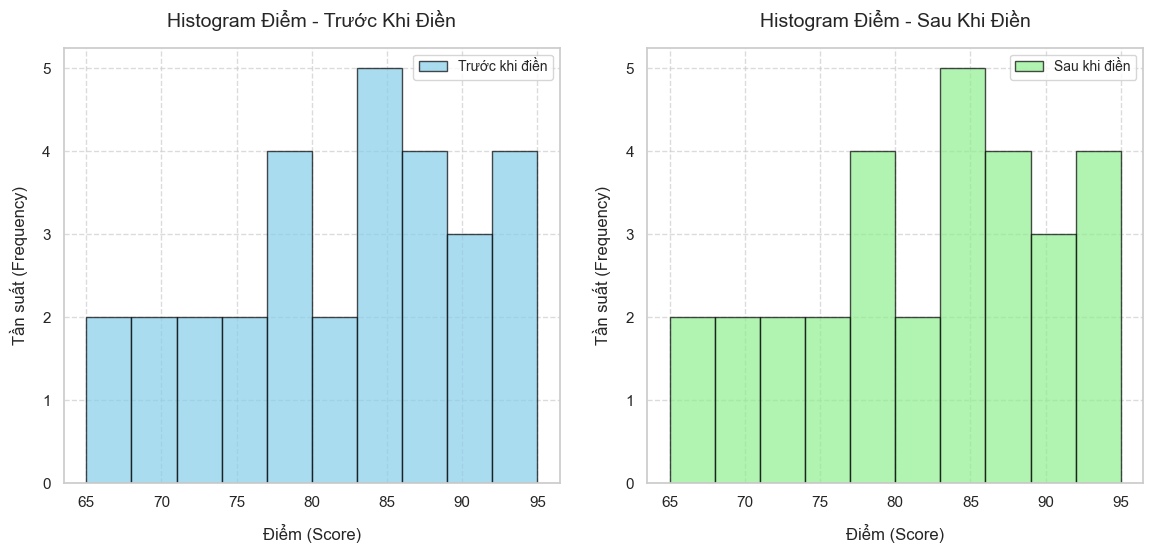

In [1640]:
#2 điền score bằng giá trị trung bình của từng course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))
# In dữ liệu sau khi điền giá trị thiếu để kiểm tra
print("\nDữ liệu sau khi điền giá trị thiếu:")
print(df)
# Thiết lập phong cách biểu đồ với seaborn để trông đẹp hơn
sns.set(style="whitegrid")
# Tạo biểu đồ histogram
plt.figure(figsize=(12, 6), facecolor='white')  # Kích thước lớn hơn và nền trắng

# Histogram trước khi điền giá trị
plt.subplot(1, 2, 1)
plt.hist(df['Score'].dropna(), bins=10, color='skyblue', alpha=0.7, edgecolor='black', label='Trước khi điền')
plt.xlabel('Điểm (Score)', fontsize=12, labelpad=10)
plt.ylabel('Tần suất (Frequency)', fontsize=12, labelpad=10)
plt.title('Histogram Điểm - Trước Khi Điền', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Histogram sau khi điền giá trị
plt.subplot(1, 2, 2)
plt.hist(df['Score'], bins=10, color='lightgreen', alpha=0.7, edgecolor='black', label='Sau khi điền')
plt.xlabel('Điểm (Score)', fontsize=12, labelpad=10)
plt.ylabel('Tần suất (Frequency)', fontsize=12, labelpad=10)
plt.title('Histogram Điểm - Sau Khi Điền', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Điều chỉnh layout để không bị chồng lấn
plt.tight_layout(pad=2.0)

# Hiển thị biểu đồ
plt.show()


đề xuất một phương pháp điền giá trị thiếu trong Score dựa trên đặc điểm của từng Campus. Cách tiếp cận này được cho là phù hợp vì mỗi campus có thể có mức độ khó dễ khác nhau và sinh viên có thể có phong cách học tập khác nhau.

Mỗi Campus có thể có đặc điểm khác nhau về cách thức giảng dạy, chất lượng giảng viên, hoặc cơ sở vật chất. Ví dụ, một Campus có thể cung cấp các chương trình học bổ sung, giúp sinh viên có điểm số tốt hơn so với Campus khác.

Việc điền giá trị thiếu bằng giá trị trung bình của Campus giúp phản ánh đúng tình hình điểm số của sinh viên trong cùng một môi trường học tập, thay vì áp dụng giá trị trung bình chung cho toàn bộ dataset, điều này có thể không công bằng cho sinh viên ở các Campus khác nhau.

Ưu điểm của phương pháp này:

Phương pháp này giúp điền giá trị thiếu phù hợp hơn với tình hình thực tế, vì nó dựa trên đặc điểm riêng của từng Campus.

Việc điền giá trị thiếu theo Campus có thể giúp tránh được sự thiên lệch nếu như chỉ sử dụng giá trị trung bình của toàn bộ dữ liệu mà không tính đến sự phân hóa giữa các Campus.

In [1641]:
#3 Tính độ lệch chuẩn của Study_Hours
std_study_hours = np.std(df['Study_Hours'])
print(f"Độ lệch chuẩn của Study_Hours: {std_study_hours}")


Độ lệch chuẩn của Study_Hours: 1.2872701627394643


Chính sách khuyến khích học tập: Sinh viên cần dành ít nhất 4-5 giờ học mỗi tuần. Đối với sinh viên có độ lệch chuẩn cao, trường có thể khuyến khích tham gia các lớp học nhóm hoặc sử dụng các tài nguyên học trực tuyến.

In [1642]:
#4 Tính correlation giữa Attendance (%) và Score cho từng Campus
correlation_per_campus = df.groupby('Campus').apply(lambda x: x['Attendance (%)'].corr(x['Score']))
print("Correlation giữa Attendance và Score cho từng Campus:")
print(correlation_per_campus)


Correlation giữa Attendance và Score cho từng Campus:
Campus
Campus_A    0.899397
Campus_B    0.685463
Campus_C    0.938569
dtype: float64


Đề xuất chiến lược quản lý điểm danh:

Campus có correlation cao: Tăng cường điểm danh tự động, tạo động lực tham gia học tập.

Campus có correlation thấp: Cần cải thiện chương trình học và các buổi học bắt buộc để tăng sự tham gia.

đề xuất trên làm cải thiện môi trường học tập giúp các sinh viên được tiế xúc với kiến thức nhiều hơn.

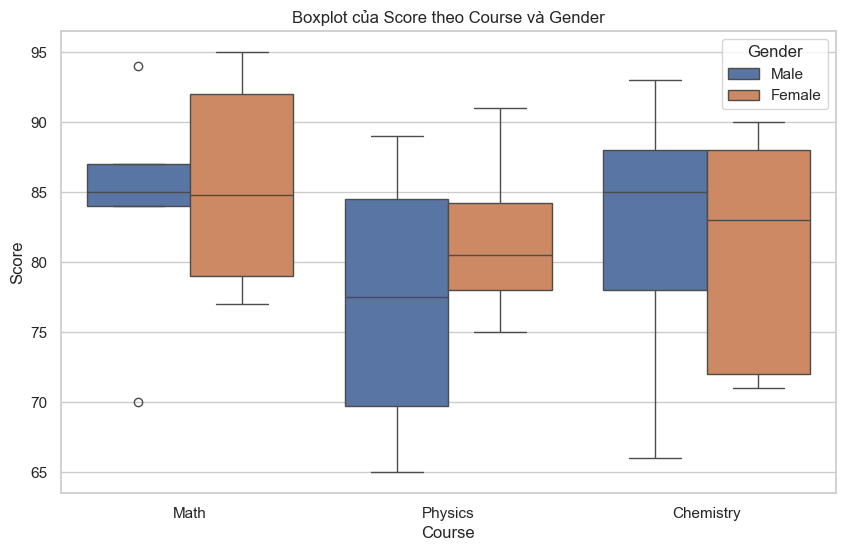

In [1643]:
#5 Vẽ boxplot của Score theo Course và Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Course', y='Score', hue='Gender')
plt.title("Boxplot của Score theo Course và Gender")
plt.show()

# Tính outlier bằng IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Score'] < (Q1 - 1.5 * IQR)) | (df['Score'] > (Q3 + 1.5 * IQR))]

Để cải thiện kết quả học tập, đặc biệt trong các môn Toán học, Vật lý và Hóa học, tôi đề xuất kế hoạch "Hỗ trợ Đích Danh" tập trung vào phân tích điểm số và giới tính của sinh viên. Đầu tiên, đánh giá năng lực đa chiều, bao gồm phong cách học tập (VAK) và kỹ năng học tập sẽ giúp xác định điểm yếu cụ thể. Kế hoạch hỗ trợ cá nhân hóa sẽ bao gồm chương trình mentor theo môn, nơi nam sinh điểm thấp môn Toán được ghép với nữ sinh điểm cao, cung cấp phòng thí nghiệm mở cho nam sinh môn Vật lý, và tạo nhóm học đa dạng cho môn Hóa học. Công nghệ sẽ được áp dụng để phát triển lộ trình học tập cá nhân cho sinh viên yếu kém, cung cấp video bài giảng ngắn và phần mềm theo dõi tiến độ. Ngoài ra, chương trình can thiệp tâm lý và đào tạo giảng viên về phương pháp giảng dạy nhạy cảm giới sẽ giúp sinh viên vượt qua áp lực học tập. Kế hoạch này không chỉ thu hẹp khoảng cách thành tích giữa các nhóm sinh viên mà còn tối ưu hóa phương pháp giảng dạy, tạo ra môi trường học tập tích cực, khuyến khích tìm kiếm hỗ trợ và phát triển hệ thống cảnh báo sớm dựa trên phân tích dữ liệu. Điều này sẽ nâng cao chất lượng giáo dục tổng thể và giúp sinh viên phát triển tốt hơn.

In [1644]:
#6 Tạo cột mới Efficiency = Score / Study_Hours
df['Efficiency'] = df['Score'] / df['Study_Hours']
best_efficiency_student = df.loc[df['Efficiency'].idxmax()]
print(f"Sinh viên có Efficiency cao nhất: {best_efficiency_student['Student_ID']}")


Sinh viên có Efficiency cao nhất: S021


Sinh viên có Efficiency cao nhất có thể nhận học bổng hoặc các phần thưởng động viên, điều này sẽ tạo động lực học tập cho sinh viên khác cố gắng noi gương theo

In [1645]:
# Điền giá trị thiếu trong Gender bằng mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Tính tỷ lệ sinh viên nữ trong từng Course
female_ratio_by_course = df[df['Gender'] == 'Female'].groupby('Course').size() / df.groupby('Course').size() * 100
print(f"Tỷ lệ sinh viên nữ trong từng Course:")
print(female_ratio_by_course)


Tỷ lệ sinh viên nữ trong từng Course:
Course
Chemistry    50.0
Math         50.0
Physics      40.0
dtype: float64


Chính sách cân bằng giới tính trong giáo dục:
Khuyến khích nữ sinh tham gia các môn STEM: Tổ chức các chương trình, sự kiện để khuyến khích nữ sinh học các môn khoa học, công nghệ, kỹ thuật, và toán học (STEM).

Chế độ học bổng cho nữ sinh: Cung cấp học bổng hoặc tài trợ cho sinh viên nữ, đặc biệt là trong các ngành ít sinh viên nữ tham gia.

Tạo môi trường học tập thân thiện: Tổ chức các hoạt động nâng cao nhận thức về bình đẳng giới và hỗ trợ nữ sinh trong các môn học.

Tác động của việc này đến môi trường học tập:
Tăng sự đa dạng và sáng tạo: Đảm bảo cả nam và nữ sinh viên tham gia tất cả các môn học, thúc đẩy sự sáng tạo và đổi mới.

Giảm phân biệt giới tính: Tạo môi trường học tập công bằng hơn, giúp mọi sinh viên đều có cơ hội học tập như nhau.

Cải thiện động lực học tập: Khuyến khích nữ sinh viên tham gia nhiều môn học hơn, đặc biệt là các môn khó, sẽ giúp họ tự tin và đạt kết quả học tập tốt hơn.

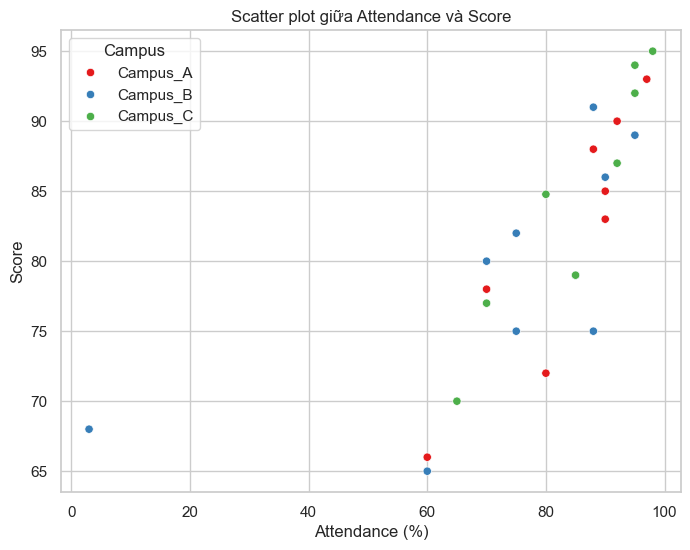

In [1646]:
#8 Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Attendance (%)', y='Score', hue='Campus', palette='Set1')
plt.title("Scatter plot giữa Attendance và Score")
plt.show()


Phân tích phân bố dữ liệu:

Vẽ scatter plot giữa Attendance (%) và Score cho từng Campus.

Kế hoạch cải thiện điểm danh:

Campus với Attendance thấp, Score cao: Tạo chương trình thưởng (học bổng, điểm thưởng) cho sinh viên tham gia đầy đủ. Điều này khuyến khích sự tham gia học tập để duy trì kết quả học tốt.

Campus với Attendance cao, Score thấp: Cải thiện chất lượng giảng dạy và tài liệu học tập. Cung cấp lớp học bổ sung hoặc hỗ trợ thêm từ giảng viên.

Campus với Attendance và Score thấp: Tăng cường hỗ trợ học tập và hoạt động động viên để nâng cao sự tham gia và cải thiện kết quả học tập.

Tại sao kế hoạch này tối ưu hóa kết quả học tập?
Khuyến khích tham gia đầy đủ sẽ giúp sinh viên hiểu rõ môn học hơn.

Chương trình hỗ trợ học tập giúp sinh viên yếu cải thiện kết quả học tập.

Giải quyết vấn đề cụ thể của từng Campus giúp tối ưu hóa chất lượng giáo dục.

Trung bình Score của từng Course:
Course
Chemistry    81.400000
Math         84.777778
Physics      79.000000
Name: Score, dtype: float64


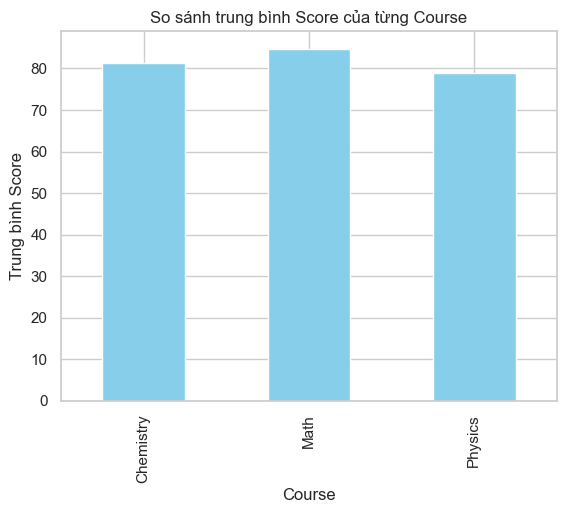

In [1647]:
#9 Điền dữ liệu thiếu và tính trung bình Score của từng Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))
avg_score_by_course = df.groupby('Course')['Score'].mean()
print("Trung bình Score của từng Course:")
print(avg_score_by_course)

# Vẽ bar chart so sánh
avg_score_by_course.plot(kind='bar', color='skyblue')
plt.title("So sánh trung bình Score của từng Course")
plt.ylabel("Trung bình Score")
plt.show()


Tính điểm trung bình của từng môn học:

Sau khi điền dữ liệu thiếu, tính điểm trung bình của mỗi môn học (Course).

Vẽ bar chart so sánh điểm trung bình của các môn học.

Chiến lược cải thiện cho môn học có điểm trung bình thấp nhất:

Nếu môn học có điểm trung bình thấp nhất là Math:

Chiến lược: Cung cấp thêm các bài tập thực hành, lớp học thêm hoặc buổi giải đáp thắc mắc.

Lý do: Math yêu cầu sự hiểu biết sâu và khả năng giải quyết vấn đề, việc luyện tập thường xuyên sẽ giúp sinh viên cải thiện điểm số.

Nếu môn học có điểm trung bình thấp nhất là Physics:

Chiến lược: Tăng cường thực hành và mô phỏng thí nghiệm, sử dụng phần mềm mô phỏng hoặc video để sinh viên hiểu rõ lý thuyết.

Lý do: Physics cần sự kết hợp giữa lý thuyết và thực hành, giúp sinh viên dễ hình dung và áp dụng kiến thức vào thực tế.

Nếu môn học có điểm trung bình thấp nhất là Chemistry:

Chiến lược: Tạo các buổi thực hành nhóm và thảo luận về các phương pháp giải bài tập, thực hành trong phòng thí nghiệm.

Lý do: Chemistry yêu cầu khả năng làm việc nhóm và hiểu rõ các phương pháp thí nghiệm, việc thảo luận và thực hành sẽ giúp sinh viên nắm vững kiến thức.

In [1648]:
#10 Tìm sinh viên có Attendance dưới 70% nhưng Score trên 85
students = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]
print(f"Sinh viên có Attendance dưới 70% nhưng Score trên 85:")
print(students[['Student_ID', 'Attendance (%)', 'Score']])


Sinh viên có Attendance dưới 70% nhưng Score trên 85:
Empty DataFrame
Columns: [Student_ID, Attendance (%), Score]
Index: []


đề xuất: nên chỉnh sửa lại dữ liệu nhiều hơn để có trường hợp đưa ra đề xuất, đề xuất chính nên xử lí mạnh tay với sinh viên có attendance dưới 70% và score phải không được cao hơn 85% vì phải đi học thì mới có điểm và nên mạnh tay hơn với những thành phần lười học nhằm tạo ra một môi trường học tập lành mạnh

In [1649]:
#11 Loại bỏ tất cả các hàng có giá trị thiếu trong cột Score, Attendance (%) và Study_Hours
df_cleaned = df.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])

# Tách dữ liệu
X = df_cleaned[['Attendance (%)', 'Study_Hours']]
y = df_cleaned['Score']

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
regressor = LinearRegression()
regressor.fit(X, y)

# Dự đoán giá trị Score bị thiếu
df['Score'] = df.apply(
    lambda row: regressor.predict([[row['Attendance (%)'], row['Study_Hours']]])[0] 
    if np.isnan(row['Score']) else row['Score'], axis=1
)


+4

In [1650]:
#12 Tính skewness của Score
score_skewness = skew(df['Score'].dropna())
print(f"Skewness của Score: {score_skewness}")

Skewness của Score: -0.3575430514899951


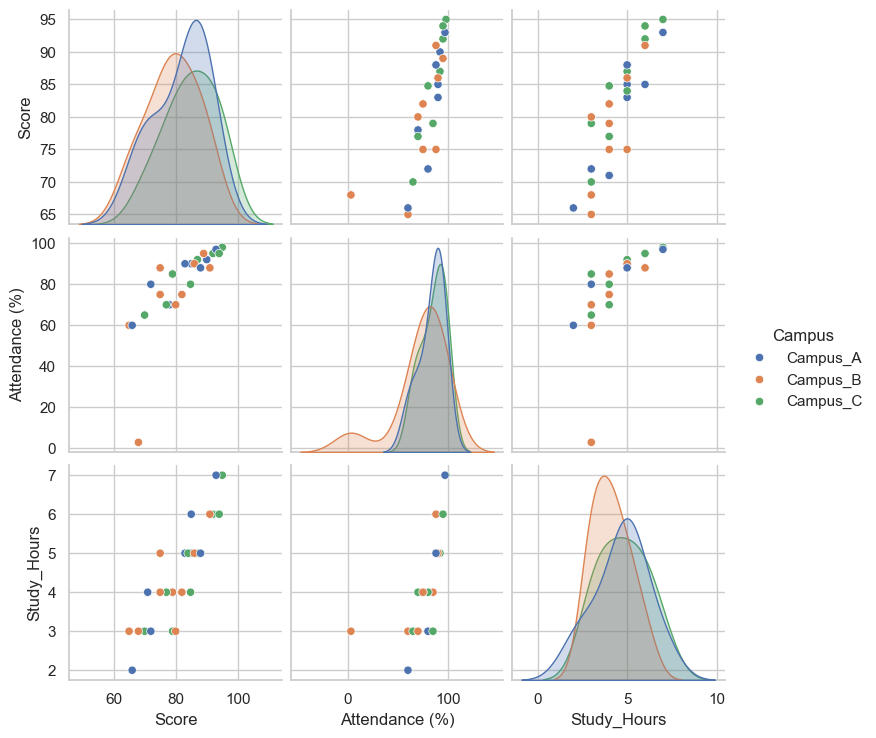

In [1651]:
#13 Vẽ pairplot
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours', 'Campus']], hue='Campus')
plt.show()


Dựa trên kết quả phân tích biểu đồ mối quan hệ giữa Score, Attendance và Study_Hours, tôi đề xuất một mô hình đánh giá kết quả học tập mới mang tên Chỉ số Thành công Học thuật (Academic Success Index - ASI). Mô hình này không chỉ xem xét điểm số cuối kỳ mà còn phản ánh toàn diện quá trình học tập của sinh viên bằng cách kết hợp nhiều yếu tố có ảnh hưởng thực tế. Công thức tính ASI như sau:

ASI = 0.6 × Score + 0.3 × f(Attendance) + 0.1 × g(Study_Hours) + Bonus_Campus

Trong đó, hàm f(Attendance) thể hiện tác động của tỷ lệ tham dự lớp, đặc biệt nhấn mạnh đến ngưỡng 70% – dưới mức này, tác động đến kết quả học tập tăng rõ rệt. Hàm g(Study_Hours) mô phỏng hiệu quả học tập theo số giờ học, cho thấy lợi ích tối ưu trong khoảng 5–6 giờ mỗi ngày, sau đó hiệu suất bắt đầu giảm dần – phản ánh hiệu ứng bão hòa. Phần điều chỉnh Bonus_Campus được đưa vào để thích ứng với sự khác biệt rõ ràng giữa các khu học xá, chẳng hạn như Campus_B vốn có phân phối thời gian học và tỷ lệ tham dự đặc thù, cần được điều chỉnh khoảng ±3% để đảm bảo công bằng.

Mô hình ASI được xây dựng dựa trên cơ sở dữ liệu thực tế, trong đó biểu đồ phân tích cho thấy Attendance có mối tương quan rất mạnh với Score ở khoảng 70–95%, trong khi Study_Hours có ảnh hưởng không tuyến tính và ít rõ rệt hơn. Đồng thời, một số trường hợp ngoại lệ với điểm số cao nhưng tỷ lệ tham dự thấp cũng cho thấy rằng mô hình cũ quá phụ thuộc vào điểm thi cuối kỳ. ASI giúp làm giảm ảnh hưởng của các giá trị cực đoan này, tạo nên một hệ thống đánh giá cân bằng hơn giữa kết quả và nỗ lực.

Điểm nổi bật của mô hình là tính thích ứng và định hướng. Thay vì áp dụng một công thức cứng nhắc cho mọi sinh viên, ASI linh hoạt theo từng đặc điểm của campus, đồng thời khuyến khích sinh viên phát triển toàn diện: duy trì tỷ lệ tham dự lớp ổn định, lập kế hoạch học tập hiệu quả và hướng đến kết quả bền vững. Nhờ đó, mô hình không chỉ giúp đánh giá công bằng hơn, mà còn thúc đẩy sự cải thiện tích cực trong thói quen học tập của sinh viên.

Tỷ lệ sinh viên có Score trên 80:
Campus
Campus_A    0.636364
Campus_B    0.400000
Campus_C    0.666667
dtype: float64


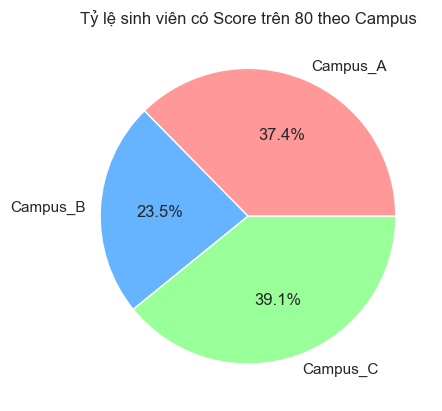

In [1652]:
#14 Nhóm dữ liệu theo Campus và tính tỷ lệ sinh viên có Score trên 80
score_above_80 = df.groupby('Campus').apply(lambda x: (x['Score'] > 80).mean())
print("Tỷ lệ sinh viên có Score trên 80:")
print(score_above_80)

# Vẽ pie chart
score_above_80.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Tỷ lệ sinh viên có Score trên 80 theo Campus")
plt.ylabel('')
plt.show()


Trong quá trình phân tích tỷ lệ sinh viên đạt điểm số cao (Score > 80) tại ba campus khác nhau, một điều thú vị đã được phát hiện: mỗi khu học xá mang những đặc điểm riêng biệt về học lực, tinh thần học tập và tiềm năng phát triển. Campus C hiện đang dẫn đầu với tỷ lệ sinh viên xuất sắc đạt 39.1%, Campus A bám sát ở mức 37.4%, trong khi Campus B có khoảng cách đáng kể, chỉ đạt 23.5%. Những con số này không chỉ phản ánh kết quả học tập, mà còn mở ra hướng tiếp cận mới cho việc xây dựng môi trường học tập tích cực và công bằng.

Thay vì áp dụng một chính sách khen thưởng đồng nhất cho toàn hệ thống, sự khác biệt rõ ràng giữa các campus đặt ra yêu cầu cần thiết phải thiết kế chiến lược khích lệ theo đặc điểm riêng của từng nơi. Bởi lẽ, cùng một phần thưởng có thể tạo ra cảm hứng mạnh mẽ ở Campus này, nhưng lại trở nên vô hiệu hoặc thậm chí không công bằng ở Campus khác. Từ chính phân tích dữ liệu học tập, ba chiến lược phù hợp đã được đề xuất – mỗi chiến lược là một lời phản hồi đúng lúc với nhu cầu và hành vi học tập đặc thù.

Với Campus C, nơi có tỷ lệ sinh viên xuất sắc cao nhất, chiến lược “Duy trì Xuất sắc” được triển khai với trọng tâm là tạo ra không khí cạnh tranh tích cực trong nhóm sinh viên giỏi. Những phần thưởng mang tính danh giá như học bổng cho top 10%, cơ hội trở thành đại sứ học thuật, thực tập tại doanh nghiệp uy tín hay vinh danh trên các nền tảng trường – tất cả đều hướng đến việc duy trì thành tích cao và khuyến khích phát triển chuyên môn sâu hơn.

Campus A tuy có thành tích tốt nhưng vẫn còn không gian để bứt phá. Chính vì vậy, chiến lược “Bứt phá Tiềm năng” ra đời như một cú hích cho cả nhóm sinh viên khá và giỏi. Thay vì chỉ thưởng cho điểm cao tuyệt đối, chiến lược này tập trung vào quá trình tiến bộ: từ hệ thống điểm thưởng tích lũy, giải thưởng cho sự cải thiện mạnh mẽ, đến các ưu tiên học thuật như chọn giảng viên hay lớp học. Điều này tạo ra một vòng tròn khuyến khích đa chiều – không ai bị bỏ lại phía sau, và mọi nỗ lực đều được ghi nhận.

Khác biệt hoàn toàn, Campus B là nơi cần nhiều hơn sự động viên. Với tỷ lệ sinh viên giỏi thấp nhất, chiến lược “Vươn lên Mạnh mẽ” không tìm cách ganh đua ngay với các campus khác, mà tập trung vào cảm hứng từ tiến bộ. Việc tổ chức khen thưởng theo nhóm nhỏ, giảm học phí cho cá nhân cải thiện vượt bậc, mentoring giữa sinh viên giỏi và tiến bộ, hay sự kiện tôn vinh quá trình – tất cả đều nhằm xây dựng lại lòng tin, giảm cảm giác thất bại và tạo môi trường phát triển vững chắc từ nền thấp.

Nhìn tổng thể, việc áp dụng các chiến lược khác biệt hóa không chỉ là một giải pháp học thuật, mà còn là cách tiếp cận nhân văn. Nó cho thấy sự thấu hiểu rằng mỗi môi trường học tập đều có hành trình riêng, và mỗi sinh viên đều xứng đáng có cơ hội phát triển trong điều kiện phù hợp với họ nhất. Khi chiến lược được thiết kế sát với dữ liệu và hiện trạng thực tế, tác động sẽ rõ ràng và sâu sắc: từ thiết lập văn hóa học tập tích cực, xây dựng cộng đồng học thuật đặc sắc tại từng campus, cho đến tối ưu hóa nguồn lực và tạo ra ảnh hưởng bền vững.

In [1653]:
#15 Tạo hàm xác định sinh viên có Score ngoài 2 độ lệch chuẩn
def identify_outliers(df):
    mean = df['Score'].mean()
    std_dev = df['Score'].std()
    return df[(df['Score'] < (mean - 2 * std_dev)) | (df['Score'] > (mean + 2 * std_dev))]

outliers = identify_outliers(df)
print(outliers)


Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


Dù trong dữ liệu hiện tại không xuất hiện sinh viên có điểm số nằm ngoài 2 độ lệch chuẩn, việc chuẩn bị sẵn một quy trình đánh giá lại cho các trường hợp đặc biệt này là cần thiết. Điều này không chỉ đảm bảo công bằng mà còn giúp phát hiện những tín hiệu cảnh báo hoặc tiềm năng nổi bật trong quá trình học tập. Từ góc nhìn phân tích dữ liệu và thực tiễn giáo dục, điểm số quá cao hoặc quá thấp đều có thể mang ý nghĩa đặc biệt, và do đó không nên bị bỏ qua như ngoại lệ thuần túy.

1. Cơ sở xác định điểm số ngoại lệ

Việc xác định sinh viên có điểm số ngoại lệ dựa vào z-score (điểm chuẩn hóa), với ngưỡng ±2 độ lệch chuẩn so với trung bình. Các sinh viên thuộc nhóm này sẽ được chia thành hai phân loại:

Điểm cực cao: Có thể phản ánh năng lực vượt trội, hoặc sự bất thường trong quy trình đánh giá.

Điểm cực thấp: Có thể là dấu hiệu của khó khăn học tập, rào cản cá nhân, hoặc sai sót đánh giá.

2. Đề xuất quy trình "Đánh giá Đa chiều cho Điểm số Ngoại lệ"

Quy trình gồm năm bước liên tiếp, vừa đảm bảo tính khách quan vừa tạo điều kiện hỗ trợ phù hợp:

Bước 1 – Phát hiện và phân loại:
Ứng dụng phương pháp thống kê để nhận diện điểm số ngoại lệ theo z-score. Việc phân loại sớm giúp điều chỉnh lộ trình đánh giá phù hợp với từng trường hợp.

Bước 2 – Thu thập dữ liệu bổ sung:
Tổng hợp lịch sử học tập, điểm danh, thời lượng học và hoàn cảnh cá nhân. Kết hợp phỏng vấn giảng viên để có góc nhìn toàn diện về quá trình học tập thực tế.

Bước 3 – Đánh giá lại đa phương thức:
Tổ chức đánh giá lại bằng hình thức khác (tự luận, vấn đáp, thực hành). Mời giảng viên thứ hai (độc lập) chấm lại bài thi gốc, từ đó đảm bảo tính công tâm trong thẩm định.

Bước 4 – Hội đồng đánh giá và quyết định:
Một hội đồng ít nhất 3 giảng viên, bao gồm người không trực tiếp giảng dạy lớp đó, phân tích toàn bộ dữ liệu để đưa ra kết luận về điểm số chính thức.

Bước 5 – Hỗ trợ sau đánh giá:

Với điểm cực thấp: xây dựng kế hoạch học tập cá nhân, hỗ trợ học thuật.

Với điểm cực cao: mở rộng cơ hội học nâng cao, tham gia nghiên cứu hoặc mentoring học thuật.
Tiến trình của sinh viên sẽ được theo dõi trong các học phần tiếp theo.

3. Giá trị cốt lõi của quy trình này

Quy trình trên không đơn thuần là một cơ chế sửa sai, mà là cách tiếp cận nhân văn và khoa học trong giáo dục. Nó giúp:

Giảm rủi ro đánh giá sai lệch nhờ áp dụng nhiều hình thức kiểm tra và nhiều nguồn thông tin độc lập.

Phản ánh năng lực học tập chân thực bằng cách đặt điểm số trong bối cảnh tổng thể, thay vì nhìn qua một kỳ thi duy nhất.

Tạo điều kiện phát triển cá nhân hóa, giúp sinh viên gặp khó khăn được hỗ trợ kịp thời, đồng thời giúp sinh viên nổi bật được thử thách ở mức cao hơn.

Tăng tính công bằng và minh bạch trong hệ thống giáo dục khi mọi quyết định được đưa ra bởi một hội đồng đa chiều, tránh thiên vị hoặc cảm tính.

4. Tác động lâu dài và định hướng phát triển

Việc áp dụng quy trình này không chỉ giải quyết các ca đặc biệt một cách hợp lý mà còn củng cố hệ thống đánh giá của nhà trường. Nó nâng cao niềm tin của sinh viên vào sự công bằng, thúc đẩy động lực học tập và tạo ra văn hóa học đường hướng đến tiến bộ cá nhân, không bị ràng buộc cứng nhắc bởi điểm số tuyệt đối.



ANN

In [1654]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Câu 16: KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df[['Attendance (%)', 'Study_Hours']] = imputer.fit_transform(df[['Attendance (%)', 'Study_Hours']])

# Hiển thị kết quả sau khi điền giá trị thiếu
print(df)

   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.000000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          3.5    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    Male   
5        S006  Chemistry  88.000000            89.0          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          5.0  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000            91.5          6.0    Male   
12       S01

Khi đối mặt với dữ liệu thiếu, đặc biệt là trong các nghiên cứu học tập, việc lựa chọn phương pháp xử lý thích hợp rất quan trọng. So với phương pháp thay thế giá trị thiếu bằng trung vị, KNN Imputer mang lại kết quả dự đoán tốt hơn nhờ vào việc tận dụng mối quan hệ giữa các giá trị lân cận. Cụ thể, KNN Imputer sử dụng thông tin từ các sinh viên có đặc điểm tương tự để dự đoán các giá trị thiếu, như trong trường hợp của tỷ lệ điểm danh (Attendance), nơi các giá trị dự đoán có sự khác biệt rõ rệt (ví dụ: 90.0, 92.67, 68.33, 90.0) cho từng sinh viên, phản ánh đặc điểm cá nhân và sự tương quan với các yếu tố khác như điểm số và giờ học. Ngược lại, phương pháp thay thế bằng trung vị sử dụng một giá trị duy nhất để thay thế tất cả các giá trị thiếu, dẫn đến việc bỏ qua sự đa dạng và mối quan hệ giữa các yếu tố, điều này có thể làm giảm độ chính xác trong mô hình.

Để cải thiện chất lượng dữ liệu và giảm thiểu sự phụ thuộc vào các phương pháp ước lượng, một giải pháp hiệu quả là triển khai hệ thống thu thập dữ liệu học tập tự động và theo thời gian thực thông qua ứng dụng di động. Hệ thống này sẽ tích hợp công nghệ điểm danh tự động qua GPS hoặc mã QR, cùng với ứng dụng "Study Tracker" ghi nhận thời gian học của sinh viên. Thêm vào đó, việc thu thập dữ liệu từ các nền tảng học trực tuyến và không gian học vật lý như thư viện và phòng tự học giúp cung cấp một cái nhìn toàn diện và chính xác hơn về quá trình học tập của sinh viên. Hệ thống này không chỉ giảm thiểu sai sót do trí nhớ và nhập liệu thủ công mà còn cung cấp thông tin thời gian thực, giúp theo dõi liên tục và cải thiện độ chính xác của dữ liệu. Đồng thời, việc sử dụng các dữ liệu bổ sung này sẽ giúp nâng cao chất lượng phân tích và tạo ra môi trường học tập cá nhân hóa, khuyến khích sinh viên cải thiện kết quả học tập một cách bền vững.

In [1655]:
# Câu 17: One-hot encoding và chuẩn hóa
course_encoded = pd.get_dummies(df['Course'], prefix='Course')
df_processed = pd.concat([df, course_encoded], axis=1)

# Hiển thị kết quả sau khi mã hóa
print(df_processed)

# Chuẩn hóa các đặc trưng Attendance và Study_Hours
features = df_processed[['Attendance (%)', 'Study_Hours', 
                         'Course_Chemistry', 'Course_Math', 'Course_Physics']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Hiển thị dữ liệu sau khi chuẩn hóa
print(features_scaled)

   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.000000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          3.5    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    Male   
5        S006  Chemistry  88.000000            89.0          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          5.0  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000            91.5          6.0    Male   
12       S01

Để trực quan hóa mối quan hệ giữa các yếu tố học tập và kết quả học tập (Score), tôi đề xuất sử dụng Parallel Coordinates Plot kết hợp với Clustering. Phương pháp này cho phép hiển thị đồng thời tất cả các đặc trưng quan trọng, như Attendance, Study Hours, và Score, giúp người dùng nhận diện mối quan hệ phức tạp giữa các yếu tố này.

Parallel Coordinates Plot có khả năng phát hiện các mối tương quan phức tạp, không chỉ tuyến tính, giúp người dùng dễ dàng nhìn thấy ảnh hưởng của các đặc trưng đến kết quả học tập. Đồng thời, việc áp dụng Clustering giúp phân nhóm sinh viên theo các đặc điểm học tập tương tự, từ đó có thể đưa ra chiến lược hỗ trợ phù hợp cho từng nhóm. Phương pháp này cũng giúp so sánh ảnh hưởng của từng môn học đến kết quả tổng thể, tạo ra một cái nhìn tổng thể và trực quan hơn về dữ liệu.

In [1656]:
# Câu 18:
# Dữ liệu chuẩn hóa
X = features_scaled
y = df_processed['Score'].values  # Mục tiêu là Score

# Chia tập dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi dữ liệu thành tensor của PyTorch để có thể sử dụng trong mô hình
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tập huấn luyện đầu vào
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Tập huấn luyện đầu ra (Score)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tập kiểm tra đầu vào
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Tập kiểm tra đầu ra (Score)


In [1657]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        # Tầng 1: 5 nơ-ron vào (input layer), 32 nơ-ron ra
        self.layer1 = nn.Linear(5, 32)
        # Tầng 2: 32 nơ-ron vào, 16 nơ-ron ra
        self.layer2 = nn.Linear(32, 16)
        # Tầng 3: 16 nơ-ron vào, 8 nơ-ron ra
        self.layer3 = nn.Linear(16, 8)
        # Tầng đầu ra: 8 nơ-ron vào, 1 nơ-ron ra (Score)
        self.output = nn.Linear(8, 1)
        # Hàm kích hoạt ReLU (Rectified Linear Unit)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Forward pass: dữ liệu đi qua từng tầng của mạng nơ-ron
        x = self.relu(self.layer1(x))  # Tầng 1
        x = self.relu(self.layer2(x))  # Tầng 2
        x = self.relu(self.layer3(x))  # Tầng 3
        x = self.output(x)  # Output layer
        return x

# Khởi tạo mô hình ANN, optimizer và hàm mất mát
model = ANNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer với learning rate 0.001
loss_fn = nn.MSELoss()  # Sử dụng Mean Squared Error (MSE) làm hàm mất mát


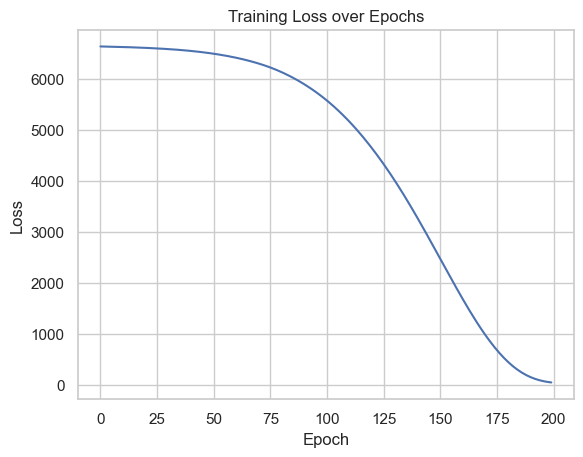

In [1658]:
# Huấn luyện mô hình với 200 epochs và sử dụng Early Stopping
epochs = 200
patience = 20  # Nếu mô hình không cải thiện trong 20 epoch, dừng huấn luyện
best_loss = float('inf')  # Mất mát tốt nhất hiện tại
epochs_since_improvement = 0  # Đếm số epoch không có sự cải thiện

train_losses = []  # Lưu trữ giá trị loss qua từng epoch
for epoch in range(epochs):
    model.train()  # Đặt mô hình ở chế độ huấn luyện
    optimizer.zero_grad()  # Xóa gradient trước khi tính toán mới

    # Dự đoán đầu ra (y_pred) từ dữ liệu huấn luyện (X_train_tensor)
    y_pred = model(X_train_tensor)
    # Tính toán hàm mất mát (loss) giữa dự đoán và giá trị thực tế
    loss = loss_fn(y_pred, y_train_tensor)

    # Lan truyền ngược (Backpropagation) và cập nhật trọng số
    loss.backward()
    optimizer.step()

    # Lưu giá trị mất mát của epoch này
    train_losses.append(loss.item())

    # Kiểm tra early stopping: Nếu không có sự cải thiện trong `patience` epoch, dừng huấn luyện
    if loss.item() < best_loss:
        best_loss = loss.item()
        epochs_since_improvement = 0  # Đặt lại đếm số epoch không cải thiện
    else:
        epochs_since_improvement += 1

    if epochs_since_improvement >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Đề xuất kiến trúc ANN cải tiến: Mạng "chia để trị"
Tôi đề xuất một kiến trúc ANN phân nhánh (branched architecture) thay vì kiến trúc tuần tự hiện tại:

Input Layer: 5 nơ-ron (Course_Math, Course_Physics, Course_Chemistry, Attendance (%), Study_Hours).
Branch 1 (Xử lý Course):
Hidden Layer 1a: 8 nơ-ron, ReLU (xử lý các đặc trưng môn học: Course_Math, Course_Physics, Course_Chemistry).
Branch 2 (Xử lý Attendance và Study_Hours):
Hidden Layer 1b: 8 nơ-ron, ReLU (xử lý Attendance (%) và Study_Hours).
Kết hợp (Concatenate):
Hidden Layer 2: 16 nơ-ron, ReLU (kết hợp đầu ra từ Branch 1 và Branch 2: 8 + 8 = 16 nơ-ron).
Hidden Layer 3: 8 nơ-ron, ReLU.
Output Layer: 1 nơ-ron (Score).
Cấu trúc minh họa:

Input (5) → [Branch 1: (3 → 8)] + [Branch 2: (2 → 8)] → Concat (16) → Hidden (8) → Output (1).
Lý do cải tiến dựa trên đặc điểm dữ liệu giáo dục
Xử lý đặc trưng song song:
Dữ liệu giáo dục có các đặc trưng với bản chất khác nhau: Course (phân loại) và Attendance (%), Study_Hours (liên tục). Kiến trúc phân nhánh tách biệt xử lý từng loại đặc trưng, giúp mô hình học tốt hơn các mẫu riêng lẻ trước khi kết hợp.
Mô phỏng quá trình đánh giá thực tế:
Trong giáo dục, giảng viên thường xem xét từng yếu tố (môn học, điểm danh, giờ học) một cách độc lập trước khi tổng hợp. Kiến trúc phân nhánh mô phỏng cách đánh giá này, cải thiện khả năng dự đoán.
Nắm bắt mối quan hệ phi tuyến:
Các đặc trưng có thể tương tác phức tạp, ví dụ: đạt ngưỡng điểm danh 80% nhưng số giờ học khác nhau sẽ ảnh hưởng khác đến điểm số. Kiến trúc phân nhánh cho phép mô hình học các mối quan hệ phi tuyến này hiệu quả hơn.
Hiệu quả với dữ liệu giáo dục hạn chế:
Dữ liệu giáo dục thường có kích thước nhỏ, và mô hình hiện tại (32-16-8) có thể quá phức tạp, dễ dẫn đến overfitting (như biểu đồ chỉ có training loss, không kiểm tra được validation loss). Kiến trúc phân nhánh giảm số tham số ở giai đoạn đầu, giảm nguy cơ overfitting.

In [1659]:
# Câu 19: Đánh giá mô hình trên tập kiểm tra
model.eval()  # Đặt mô hình ở chế độ kiểm tra (evaluation mode)
y_pred_test = model(X_test_tensor).detach().numpy()  # Dự đoán trên tập kiểm tra

# Tính toán MSE và R² trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
r2 = r2_score(y_test, y_pred_test)  # R² score (Độ chính xác mô hình)

# In ra MSE và R²
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 17.11201854153963
R²: 0.8275384469497685


Mặc dù mô hình hiện tại đã đạt được R² = 0.827 và MSE = 17.11, cho thấy hiệu suất khá tốt, vẫn có thể cải thiện để tối ưu hóa độ chính xác và khả năng tổng quát hóa. Một số nguyên nhân dẫn đến sai lệch dự đoán bao gồm việc thiếu các biến quan trọng trong dữ liệu đầu vào như chất lượng giảng viên, phản hồi sinh viên và động lực học tập, cũng như mối quan hệ phi tuyến phức tạp giữa các đặc trưng như Attendance và Study_Hours. Dữ liệu có thể mang thiên kiến từ các Campus hoặc môn học, khiến mô hình không phản ánh đầy đủ sự đa dạng của sinh viên. Ngoài ra, dữ liệu mẫu quá nhỏ (30 mẫu) cũng khiến mô hình khó tổng quát hóa cho toàn bộ quần thể sinh viên, trong khi các yếu tố bên ngoài như hoàn cảnh kinh tế hay môi trường xã hội chưa được nắm bắt.

Để cải thiện mô hình, có thể bổ sung các đặc trưng mới như tương tác sinh viên-giảng viên, chất lượng tài liệu học tập và động lực học tập, giúp mô hình hiểu rõ hơn về các yếu tố ảnh hưởng đến kết quả học tập. Xây dựng các mô hình phân cấp cho từng môn học và kết hợp chúng bằng phương pháp ensemble sẽ nâng cao độ chính xác. Thêm vào đó, thay vì chỉ dự đoán điểm cuối kỳ, mô hình nên phân tích sự tiến bộ của sinh viên qua thời gian, sử dụng các chỉ số như Attendance và Study_Hours theo từng tuần hoặc điểm giữa kỳ. Điều chỉnh mô hình theo bối cảnh của từng Campus và nhóm sinh viên, cùng với phương pháp điền giá trị thiếu thông minh hơn, sẽ giúp cải thiện tính chính xác và giảm thiểu thiên bias. Những cải tiến này không chỉ giúp giảm MSE và tăng R² mà còn tạo ra một hệ thống dự đoán kết quả học tập toàn diện và phù hợp hơn với thực tế giáo dục.